KEY OBSERVATIONS REGARDING THE PYMACEUTICALS STUDY

Overall, of the four relevant treatments under consideration - namely, Capomulin, Infubinol, Ketapril, and Placebo) -
we found that Capomulin seems the most promising and effective in treating tumors in mice. Below, you will find three key observations we concldued from the study data:
        1. Capomulin is the only treatment for which tumor volume decreases over a 45 day period in mice.
        2. Over 45 days of treatment, Capomulin has the least increase in metastatic sites.
        3. Capomulin has the highest survival rate with 21 of 25 mice survival over 45 days of treatment.

In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [4]:
# File to Load (Remember to Change These)
mouse_drug_data = "mouse_drug_data.csv"
clinical_trial_data = "clinicaltrial_data.csv"

In [5]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv("Resources/mouse_drug_data.csv")
clinical_trial_data = pd.read_csv('Resources/clinicaltrial_data.csv')

In [6]:
# Combine the data into a single dataset
combined_data_df = pd.merge(clinical_trial_data,mouse_drug_data, how='left', on = 'Mouse ID')
#Rename columns to make it smoother to code with (N.B. Personal preference)
renamed_df = combined_data_df.rename(columns = {'Mouse ID':'Mouse_ID','Tumor Volume (mm3)':'Tumor_Volume', 'Metastatic Sites':'Metastatic_Sites'})
renamed_df.head()

,Mouse_ID,Timepoint,Tumor_Volume,Metastatic_Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## 1. Tumor Response to Treatment

In [7]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint an
# Convert to DataFrame
intermediate_df= renamed_df.groupby(['Drug','Timepoint',]).Tumor_Volume.mean().to_frame().reset_index()
mean_tumor_df= intermediate_df[intermediate_df['Drug'].isin(["Capomulin","Infubinol","Ketapril","Placebo"])]
# Preview DataFrame
mean_tumor_df.head()



,Drug,Timepoint,Tumor_Volume
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [8]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
intermediate2_df = renamed_df.groupby(['Drug','Timepoint',]).Tumor_Volume.sem().to_frame().reset_index() 
standard_error_df = intermediate2_df[intermediate2_df['Drug'].isin(["Capomulin","Infubinol","Ketapril","Placebo"])]
standard_error_df.head()


,Drug,Timepoint,Tumor_Volume
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [9]:
# Minor Data Munging to Re-Format the Data Frames
reformat_mean_df = mean_tumor_df.pivot(index = 'Timepoint', columns = 'Drug')
# Preview that Reformatting worked
reformat_mean_df

Tumor_Volume                                 
Drug         Capomulin  Infubinol   Ketapril    Placebo
Timepoint                                              
0            45.000000  45.000000  45.000000  45.000000
5            44.266086  47.062001  47.389175  47.125589
10           43.084291  49.403909  49.582269  49.423329
15           42.064317  51.296397  52.399974  51.359742
20           40.716325  53.197691  54.920935  54.364417
25           39.939528  55.715252  57.678982  57.482574
30           38.769339  58.299397  60.994507  59.809063
35           37.816839  60.742461  63.371686  62.420615
40           36.958001  63.162824  66.068580  65.052675
45           36.236114  65.755562  70.662958  68.084082

In [10]:
# Minor Data Munging to Re-Format the Data Frames
reformat_standard_error_df = standard_error_df.pivot(index = 'Timepoint', columns = 'Drug')
# Preview that Reformatting worked
reformat_standard_error_df

Tumor_Volume                              
Drug         Capomulin Infubinol  Ketapril   Placebo
Timepoint                                           
0             0.000000  0.000000  0.000000  0.000000
5             0.448593  0.235102  0.264819  0.218091
10            0.702684  0.282346  0.357421  0.402064
15            0.838617  0.357705  0.580268  0.614461
20            0.909731  0.476210  0.726484  0.839609
25            0.881642  0.550315  0.755413  1.034872
30            0.934460  0.631061  0.934121  1.218231
35            1.052241  0.984155  1.127867  1.287481
40            1.223608  1.055220  1.158449  1.370634
45            1.223977  1.144427  1.453186  1.351726

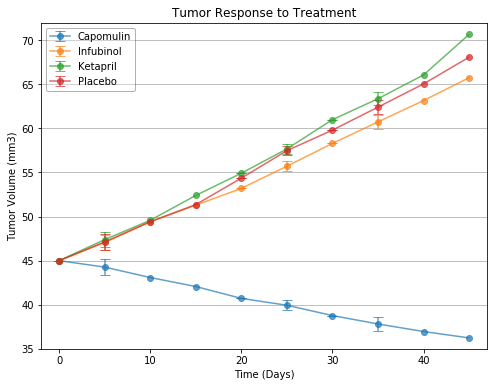

In [11]:
#create a figure
fig, ax = plt.subplots(figsize = (8,6))
ax.set_title('Tumor Response to Treatment')
ax.set_ylabel('Tumor Volume (mm3)')
drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
colors = ['red', 'blue', 'green', 'black']
mean_tumor_df.groupby('Drug').plot(marker = 'o', x='Timepoint', y='Tumor_Volume', yerr=standard_error_df, alpha=0.7, capsize=5, ax=ax, legend = False)
ax.set_xlabel('Time (Days)')
plt.xlim((-2, 47))
plt.ylim((35, 72))
ax.yaxis.grid(True)
ax.legend(drugs, loc="best", framealpha=0.3, edgecolor='k')   
plt.savefig("Tumor_Response_To_Treatment.png")
plt.show() 

## 2. Metastatic Response to Treatment

In [12]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
intermediate3_df= renamed_df.groupby(['Drug','Timepoint',]).Metastatic_Sites.mean().to_frame().reset_index()
mean_meta_df= intermediate3_df[intermediate3_df['Drug'].isin(["Capomulin","Infubinol","Ketapril","Placebo"])]
# Preview DataFrame
mean_meta_df.head()

,Drug,Timepoint,Metastatic_Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [13]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
intermediate4_df = renamed_df.groupby(['Drug','Timepoint',]).Metastatic_Sites.sem().to_frame().reset_index()
standard_error_meta_df = intermediate4_df[intermediate4_df['Drug'].isin(["Capomulin","Infubinol","Ketapril","Placebo"])]
# Preview DataFrame
standard_error_meta_df.head()

,Drug,Timepoint,Metastatic_Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [14]:
# Minor Data Munging to Re-Format the Data Frames
reformat_mean_meta_df = mean_meta_df.pivot(index = 'Timepoint', columns = 'Drug')
# Preview that Reformatting worked
reformat_mean_meta_df

Metastatic_Sites                              
Drug             Capomulin Infubinol  Ketapril   Placebo
Timepoint                                               
0                 0.000000  0.000000  0.000000  0.000000
5                 0.160000  0.280000  0.304348  0.375000
10                0.320000  0.666667  0.590909  0.833333
15                0.375000  0.904762  0.842105  1.250000
20                0.652174  1.050000  1.210526  1.526316
25                0.818182  1.277778  1.631579  1.941176
30                1.090909  1.588235  2.055556  2.266667
35                1.181818  1.666667  2.294118  2.642857
40                1.380952  2.100000  2.733333  3.166667
45                1.476190  2.111111  3.363636  3.272727

In [15]:
# Minor Data Munging to Re-Format the Data Frames
reformat_standard_error_meta_df = standard_error_meta_df.pivot(index = 'Timepoint', columns = 'Drug')
# Preview that Reformatting worked
reformat_standard_error_meta_df

Metastatic_Sites                              
Drug             Capomulin Infubinol  Ketapril   Placebo
Timepoint                                               
0                 0.000000  0.000000  0.000000  0.000000
5                 0.074833  0.091652  0.098100  0.100947
10                0.125433  0.159364  0.142018  0.115261
15                0.132048  0.194015  0.191381  0.190221
20                0.161621  0.234801  0.236680  0.234064
25                0.181818  0.265753  0.288275  0.263888
30                0.172944  0.227823  0.347467  0.300264
35                0.169496  0.224733  0.361418  0.341412
40                0.175610  0.314466  0.315725  0.297294
45                0.202591  0.309320  0.278722  0.304240

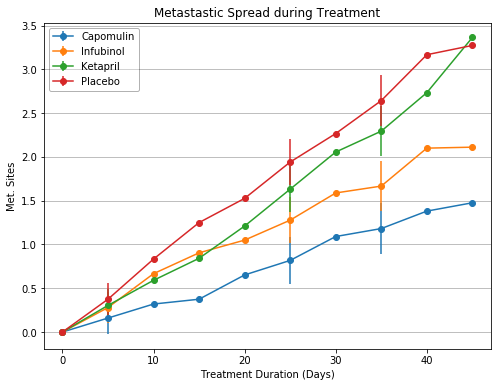

In [17]:
# Generate the Plot (with Error Bars)

fig, ax = plt.subplots(figsize = (8,6))
ax.set_title('Metastastic Spread during Treatment')
ax.set_ylabel('Met. Sites')
mean_meta_df.groupby('Drug').plot(x='Timepoint',yerr= standard_error_meta_df, y='Metastatic_Sites', marker = 'o', ax=ax, legend = False)
ax.set_xlabel('Treatment Duration (Days)')
plt.xlim((-2, 47))
ax.yaxis.grid(True)
ax.legend(drugs, loc="best", framealpha=0.3, edgecolor='k') 

# Show the Figure
plt.savefig("Metastatic_Spread_during_Treatment.png")
# Save the Figure
plt.show()


### 3. Survival Rates

In [18]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
mice_count_df= renamed_df.groupby(['Drug','Timepoint']).Mouse_ID.count().to_frame().reset_index()
new_mice_count_df= mice_count_df[mice_count_df['Drug'].isin(["Capomulin","Infubinol","Ketapril","Placebo"])]
survival_rate_df = new_mice_count_df.rename(columns = {'Mouse_ID':'Mouse_Count'})
# Preview DataFrame
survival_rate_df


,Drug,Timepoint,Mouse_Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
5,Capomulin,25,22
6,Capomulin,30,22
7,Capomulin,35,22
8,Capomulin,40,21
9,Capomulin,45,21


In [19]:
reformat_mice_count_df = new_mice_count_df.pivot(index = 'Timepoint', columns = 'Drug')
# new_reformat_mice_count_df = new_mice_count_df[mice_count_df['Drug'].isin(["Capomulin","Infubinol","Ketapril","Placebo"])]
# new_reformat_mice_count_df= new_mice_count_df.rename(columns = {'Mouse_ID':'Mouse_Count'})
# Preview the Data Frame
reformat_mice_count_df

Mouse_ID                           
Drug      Capomulin Infubinol Ketapril Placebo
Timepoint                                     
0                25        25       25      25
5                25        25       23      24
10               25        21       22      24
15               24        21       19      20
20               23        20       19      19
25               22        18       19      17
30               22        17       18      15
35               22        12       17      14
40               21        10       15      12
45               21         9       11      11

In [20]:
percentage_changes= round(reformat_mice_count_df.Mouse_ID.pct_change() *100, 2).shift(-1)
survival_rate_changes_df = percentage_changes.dropna() 
survival_rate_changes_df

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.00,0.00,-8.00,-4.00
5,0.00,-16.00,-4.35,0.00
10,-4.00,0.00,-13.64,-16.67
15,-4.17,-4.76,0.00,-5.00
20,-4.35,-10.00,0.00,-10.53
25,0.00,-5.56,-5.26,-11.76
30,0.00,-29.41,-5.56,-6.67
35,-4.55,-16.67,-11.76,-14.29
40,0.00,-10.00,-26.67,-8.33


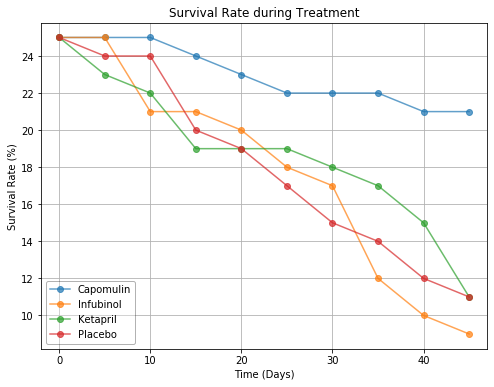

In [22]:
#COULD NOT FIGURE OUT HOW TO CODE AND DISPLAY (SEE ABOVE CODE LINE) THE SURVIVAL RATE % ON THE Y-AXIS
fig, ax = plt.subplots(figsize = (8,6))
ax.set_title('Survival Rate during Treatment')
ax.set_ylabel('Survival Rate (%)')
survival_rate_df.groupby('Drug').plot(marker = 'o', x='Timepoint', y = "Mouse_Count", alpha=0.7, ax=ax)
ax.set_xlabel('Time (Days)')
plt.xlim((-2, 47))
ax.grid(True)
ax.legend(drugs, loc="lower left", framealpha=0.3, edgecolor='k')

# Save the Figure
plt.savefig("Survival_Rate_during_Treatment.png")

# Show the Figure
plt.show()

## 4.Summary Bar Graph

In [23]:
# Calculate the percent changes for each drug
percentage_change = reformat_mean_df.pct_change(periods =9)
x = round(percentage_change.dropna() *100, 2)
# Display the data to confirm
x

Tumor_Volume                           
Drug         Capomulin Infubinol Ketapril Placebo
Timepoint                                        
45              -19.48     46.12    57.03    51.3

In [28]:
# # Store all Relevant Percent Changes into a Tuple
change = [-19.48, 46.52, 57.03, 51.3]


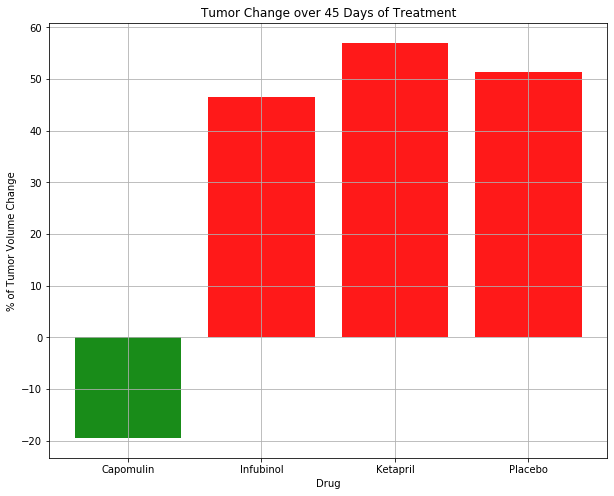

In [27]:
# Splice the data between passing and failing drugs
# Orient widths. Add labels, tick marks, etc. 
# Use functions to label the percentages of changes
# Call functions to implement the function calls
plt.figure(figsize = (10,8))
plt.bar(drugs, change, color = 'g''r''r''r', alpha=0.9, zorder = 0, align="center")
plt.title("Tumor Change over 45 Days of Treatment")
plt.xlabel("Drug")
plt.ylabel("% of Tumor Volume Change")
plt.grid()

# Save the Figure

plt.savefig("Tumor_Change_over_45_Days_of_Treatment.png")

# Show the Figure
plt.show()


![Metastatic Spread During Treatment](../Images/change.png)